In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay

In [2]:
# define some imp parameters:


RANDOM_STATE = 24
np.random.seed(RANDOM_STATE)
tf.random.set_seed(RANDOM_STATE)
EPOCHS = 200
TEST_SIZE = 0.2
REG_LAMBDA = 0.001



# Read the data:
    

In [3]:

data_df = pd.read_csv('wine.csv')
data_df

,14.23,1.71,2.43,15.6,127,2.8,3.06,.28,2.29,5.64,1.04,3.92,1065,1
0,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1
1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1
2,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1
3,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,1
4,14.20,1.76,2.45,15.2,112,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
172,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740,3
173,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750,3
174,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835,3
175,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840,3


In [4]:
data_df = pd.read_csv('wine.csv', header = None)
data_df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740,3
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750,3
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835,3
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840,3


# Perform basic operation on dataset:

In [5]:
# check is null present:
data_df.isnull().sum()

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
dtype: int64

In [6]:
# print info:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       178 non-null    float64
 1   1       178 non-null    float64
 2   2       178 non-null    float64
 3   3       178 non-null    float64
 4   4       178 non-null    int64  
 5   5       178 non-null    float64
 6   6       178 non-null    float64
 7   7       178 non-null    float64
 8   8       178 non-null    float64
 9   9       178 non-null    float64
 10  10      178 non-null    float64
 11  11      178 non-null    float64
 12  12      178 non-null    int64  
 13  13      178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB


In [7]:
# find basic statistic:

data_df.describe().T

,count,mean,std,min,25%,50%,75%,max
0,178.0,13.000618,0.811827,11.03,12.3625,13.050,13.6775,14.83
1,178.0,2.336348,1.117146,0.74,1.6025,1.865,3.0825,5.80
2,178.0,2.366517,0.274344,1.36,2.2100,2.360,2.5575,3.23
3,178.0,19.494944,3.339564,10.60,17.2000,19.500,21.5000,30.00
4,178.0,99.741573,14.282484,70.00,88.0000,98.000,107.0000,162.00
5,178.0,2.295112,0.625851,0.98,1.7425,2.355,2.8000,3.88
6,178.0,2.029270,0.998859,0.34,1.2050,2.135,2.8750,5.08
7,178.0,0.361854,0.124453,0.13,0.2700,0.340,0.4375,0.66
8,178.0,1.590899,0.572359,0.41,1.2500,1.555,1.9500,3.58
9,178.0,5.058090,2.318286,1.28,3.2200,4.690,6.2000,13.00


In [8]:
# find the shape:

data_df.shape

(178, 14)

In [9]:
# find out the unique value:

for col in data_df.columns:
    print(f'col: {col} | {data_df[col].unique()}')

col: 0 | [14.23 13.2  13.16 14.37 13.24 14.2  14.39 14.06 14.83 13.86 14.1  14.12
 13.75 14.75 14.38 13.63 14.3  13.83 14.19 13.64 12.93 13.71 12.85 13.5
 13.05 13.39 13.3  13.87 14.02 13.73 13.58 13.68 13.76 13.51 13.48 13.28
 13.07 14.22 13.56 13.41 13.88 14.21 13.9  13.94 13.82 13.77 13.74 13.29
 13.72 12.37 12.33 12.64 13.67 12.17 13.11 13.34 12.21 12.29 13.49 12.99
 11.96 11.66 13.03 11.84 12.7  12.   12.72 12.08 12.67 12.16 11.65 11.64
 12.69 11.62 12.47 11.81 12.6  12.34 11.82 12.51 12.42 12.25 12.22 11.61
 11.46 12.52 11.76 11.41 11.03 12.77 11.45 11.56 11.87 12.07 12.43 11.79
 12.04 12.86 12.88 12.81 12.53 12.84 13.36 13.52 13.62 12.87 13.32 13.08
 12.79 13.23 12.58 13.17 13.84 12.45 14.34 12.36 13.69 12.96 13.78 13.45
 12.82 13.4  12.2  14.16 13.27 14.13]
col: 1 | [1.71 1.78 2.36 1.95 2.59 1.76 1.87 2.15 1.64 1.35 2.16 1.48 1.73 1.81
 1.92 1.57 1.59 3.1  1.63 3.8  1.86 1.6  2.05 1.77 1.72 1.9  1.68 1.5
 1.66 1.83 1.53 1.8  1.65 3.99 3.84 1.89 3.98 4.04 3.59 2.02 1.75 1.67
 1.

In [10]:
# fins the correlation:

data_df.corr()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,1.000000,0.094397,0.211545,-0.310235,0.270798,0.289101,0.236815,-0.155929,0.136698,0.546364,-0.071747,0.072343,0.643720,-0.328222
1,0.094397,1.000000,0.164045,0.288500,-0.054575,-0.335167,-0.411007,0.292977,-0.220746,0.248985,-0.561296,-0.368710,-0.192011,0.437776
2,0.211545,0.164045,1.000000,0.443367,0.286587,0.128980,0.115077,0.186230,0.009652,0.258887,-0.074667,0.003911,0.223626,-0.049643
3,-0.310235,0.288500,0.443367,1.000000,-0.083333,-0.321113,-0.351370,0.361922,-0.197327,0.018732,-0.273955,-0.276769,-0.440597,0.517859
4,0.270798,-0.054575,0.286587,-0.083333,1.000000,0.214401,0.195784,-0.256294,0.236441,0.199950,0.055398,0.066004,0.393351,-0.209179
5,0.289101,-0.335167,0.128980,-0.321113,0.214401,1.000000,0.864564,-0.449935,0.612413,-0.055136,0.433681,0.699949,0.498115,-0.719163
6,0.236815,-0.411007,0.115077,-0.351370,0.195784,0.864564,1.000000,-0.537900,0.652692,-0.172379,0.543479,0.787194,0.494193,-0.847498
7,-0.155929,0.292977,0.186230,0.361922,-0.256294,-0.449935,-0.537900,1.000000,-0.365845,0.139057,-0.262640,-0.503270,-0.311385,0.489109
8,0.136698,-0.220746,0.009652,-0.197327,0.236441,0.612413,0.652692,-0.365845,1.000000,-0.025250,0.295544,0.519067,0.330417,-0.499130
9,0.546364,0.248985,0.258887,0.018732,0.199950,-0.055136,-0.172379,0.139057,-0.025250,1.000000,-0.521813,-0.428815,0.316100,0.265668


<Axes: >

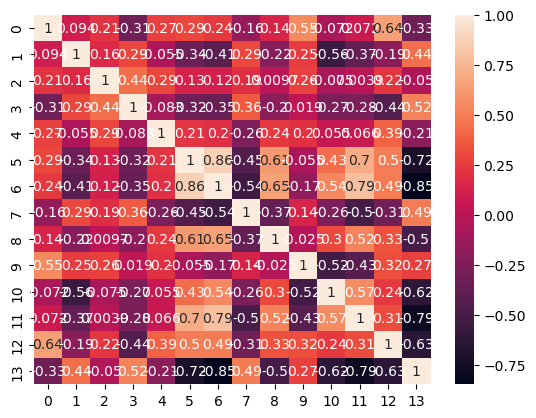

In [11]:
# plot the heatmap:

sns.heatmap(data = data_df.corr(), annot = True)

In [12]:
# define y:

labels = data_df[data_df.columns[-1]]
labels

0      1
1      1
2      1
3      1
4      1
      ..
173    3
174    3
175    3
176    3
177    3
Name: 13, Length: 178, dtype: int64

In [13]:
# define  X:

feature_df = data_df.drop(data_df.columns[-1], axis =1)
feature_df

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [14]:
X_train,X_test,y_train,y_test = train_test_split(feature_df,labels, 
                                                stratify=labels,
                                                test_size=TEST_SIZE,
                                                random_state = RANDOM_STATE)

X_train.shape,X_test.shape,y_train.shape,y_test.shape

((142, 13), (36, 13), (142,), (36,))

In [15]:
# apply std and label encoder:

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

le = LabelEncoder()
y_train = le.fit_transform(y_train)
y_test = le.transform(y_test)



In [16]:
# for signature of tf:

#tf.keras.layers.Dense?

In [17]:
# create a tensorflow model:

# regularizer:

k_reg = tf.keras.regularizers.L2(l2=REG_LAMBDA)

dor1 = 0.35
dor2 = 0.25

model = tf.keras.Sequential()


model.add(tf.keras.layers.Dense(8,
                               activation='relu',
                               kernel_regularizer=k_reg))

model.add(tf.keras.layers.Dropout(dor1))
model.add(tf.keras.layers.BatchNormalization())


model.add(tf.keras.layers.Dense(8,
                               activation='relu',
                               kernel_regularizer=k_reg))

model.add(tf.keras.layers.Dropout(dor2))
model.add(tf.keras.layers.BatchNormalization())




model.add(tf.keras.layers.Dense(3))     # output layer
model

<Sequential name=sequential, built=False>

In [18]:
# define loss_fn and compile the model:

loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits = True)

model.compile(loss = loss_fn, optimizer = 'adam', metrics=['accuracy'])



In [19]:
# fit the model:

hist = model.fit(X_train, y_train, 
                 epochs = EPOCHS, 
                 validation_data = [X_test, y_test])

Epoch 1/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 10s 302ms/step - accuracy: 0.3812 - loss: 1.2941 - val_accuracy: 0.5000 - val_loss: 1.0155
Epoch 2/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.3830 - loss: 1.2736 - val_accuracy: 0.5000 - val_loss: 0.9921
Epoch 3/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.4180 - loss: 1.1860 - val_accuracy: 0.5556 - val_loss: 0.9692
Epoch 4/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.3315 - loss: 1.2081 - val_accuracy: 0.5556 - val_loss: 0.9472
Epoch 5/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.4753 - loss: 1.1364 - val_accuracy: 0.5833 - val_loss: 0.9264
Epoch 6/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.3672 - loss: 1.2085 - val_accuracy: 0.5833 - val_loss: 0.9075
Epoch 7/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.4844 - loss: 1.1328 - val_accuracy: 0.5833 - val_loss: 0.8888
Epoch 8/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.4666 - loss: 1.1388 - val_accuracy: 0.6111 - val_los

Epoch 52/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.7841 - loss: 0.6273 - val_accuracy: 0.9722 - val_loss: 0.3959
Epoch 53/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.7213 - loss: 0.6395 - val_accuracy: 0.9722 - val_loss: 0.3898
Epoch 54/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.7599 - loss: 0.6421 - val_accuracy: 0.9722 - val_loss: 0.3847
Epoch 55/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.7735 - loss: 0.5984 - val_accuracy: 0.9722 - val_loss: 0.3792
Epoch 56/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.7497 - loss: 0.6944 - val_accuracy: 0.9722 - val_loss: 0.3730
Epoch 57/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.7979 - loss: 0.5922 - val_accuracy: 0.9722 - val_loss: 0.3679
Epoch 58/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.7197 - loss: 0.6449 - val_accuracy: 0.9722 - val_loss: 0.3639
Epoch 59/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.7603 - loss: 0.6200 - val_accuracy: 0.9722 - v

Epoch 103/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.8156 - loss: 0.5150 - val_accuracy: 0.9722 - val_loss: 0.2481
Epoch 104/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.8577 - loss: 0.5123 - val_accuracy: 0.9722 - val_loss: 0.2456
Epoch 105/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.7872 - loss: 0.5624 - val_accuracy: 0.9722 - val_loss: 0.2432
Epoch 106/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.8069 - loss: 0.5390 - val_accuracy: 0.9722 - val_loss: 0.2413
Epoch 107/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.7710 - loss: 0.5528 - val_accuracy: 0.9722 - val_loss: 0.2389
Epoch 108/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.8386 - loss: 0.4847 - val_accuracy: 0.9722 - val_loss: 0.2379
Epoch 109/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.8522 - loss: 0.4255 - val_accuracy: 0.9722 - val_loss: 0.2365
Epoch 110/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.7971 - loss: 0.4597 - val_accuracy: 0.

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.8385 - loss: 0.4629 - val_accuracy: 0.9722 - val_loss: 0.1737
Epoch 154/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.8528 - loss: 0.4713 - val_accuracy: 0.9722 - val_loss: 0.1725
Epoch 155/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.8734 - loss: 0.3876 - val_accuracy: 0.9722 - val_loss: 0.1717
Epoch 156/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.9008 - loss: 0.3159 - val_accuracy: 0.9722 - val_loss: 0.1703
Epoch 157/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.7312 - loss: 0.6016 - val_accuracy: 0.9722 - val_loss: 0.1698
Epoch 158/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.8515 - loss: 0.4015 - val_accuracy: 0.9722 - val_loss: 0.1692
Epoch 159/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.8729 - loss: 0.4514 - val_accuracy: 0.9722 - val_loss: 0.1685
Epoch 160/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.8335 - loss: 0.4972 - val_accuracy: 0.9722 - val_los

In [20]:
# create a dataframe to loss_fn:

loss_df = pd.DataFrame(hist.history)
loss_df.head()


,accuracy,loss,val_accuracy,val_loss
0,0.401408,1.270848,0.500000,1.015512
1,0.387324,1.263043,0.500000,0.992127
2,0.415493,1.210698,0.555556,0.969161
3,0.359155,1.203028,0.555556,0.947245
4,0.485915,1.151671,0.583333,0.926433


<Axes: >

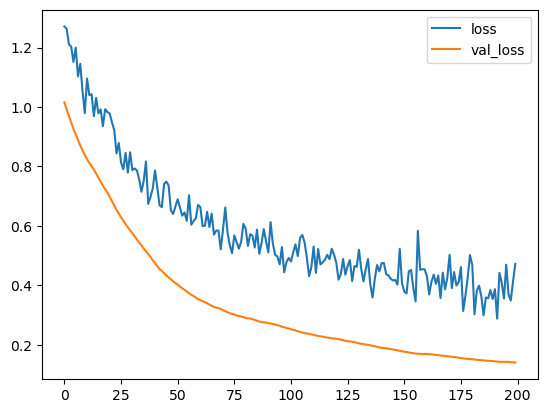

In [21]:
# plt the loss:

loss_df.plot(y = ['loss', 'val_loss'])

<Axes: >

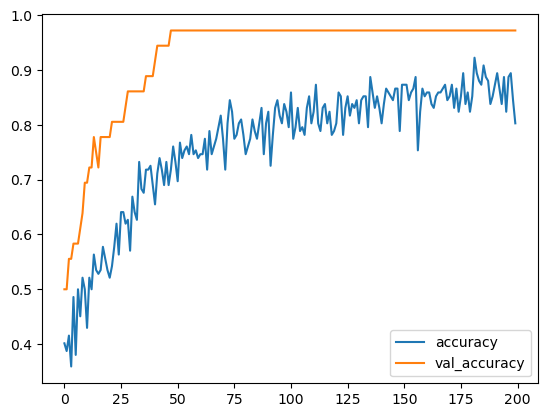

In [22]:
# plt the accuracy:

loss_df.plot(y = ['accuracy', 'val_accuracy'])

# Evaluate the model:

In [23]:
y_pred = model.predict(X_test)
y_pred

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 291ms/step


array([[-0.11081288,  4.1056504 , -0.58646816],
       [-2.3060036 ,  0.39322883,  2.9416327 ],
       [-0.15979491,  3.8996875 , -0.5545634 ],
       [ 1.422326  , -0.28776342, -2.182979  ],
       [ 2.223344  , -2.2147799 , -3.1610868 ],
       [-1.5045611 ,  1.0581155 ,  1.474602  ],
       [-2.4578495 , -1.6725917 ,  4.322492  ],
       [ 0.24720383,  0.9166119 , -0.55418384],
       [ 1.3556412 , -0.60373664, -2.156422  ],
       [ 1.8210276 , -0.61859035, -2.4742777 ],
       [ 0.69220316,  1.7129364 , -1.2508807 ],
       [ 1.4043468 ,  2.984434  , -1.8855008 ],
       [-2.3337557 ,  0.16349083,  3.4148118 ],
       [ 1.4944775 , -0.643327  , -2.2503867 ],
       [-0.1994935 ,  3.644684  , -0.5152253 ],
       [-2.0740285 , -1.7869817 ,  3.6319983 ],
       [ 2.6004608 , -3.527237  , -3.6298907 ],
       [-1.6363189 , -0.27574664,  2.2589405 ],
       [ 1.7306417 , -1.844227  , -2.523927  ],
       [ 1.4042056 , -0.8529843 , -2.233483  ],
       [-0.16642094,  3.857124  , -0.547

In [24]:
# find hishest y_pred position:

y_pred.argmax(axis = 1)

array([1, 2, 1, 0, 0, 2, 2, 1, 0, 0, 1, 1, 2, 0, 1, 2, 0, 2, 0, 0, 1, 1,
       1, 0, 0, 2, 1, 1, 1, 1, 2, 0, 2, 2, 0, 2], dtype=int64)

In [25]:
# find accuracy score:

accuracy_score(y_test, y_pred.argmax(axis = 1))


0.9722222222222222

In [26]:
# classification report:

print(classification_report(y_test, y_pred.argmax(axis = 1)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       1.00      0.93      0.96        14
           2       0.91      1.00      0.95        10

    accuracy                           0.97        36
   macro avg       0.97      0.98      0.97        36
weighted avg       0.97      0.97      0.97        36



In [27]:
# confustion matrix:

print(confusion_matrix(y_test, y_pred.argmax(axis = 1)))

[[12  0  0]
 [ 0 13  1]
 [ 0  0 10]]


In [28]:
res_df = pd.DataFrame(hist.history)
res_df

,accuracy,loss,val_accuracy,val_loss
0,0.401408,1.270848,0.500000,1.015512
1,0.387324,1.263043,0.500000,0.992127
2,0.415493,1.210698,0.555556,0.969161
3,0.359155,1.203028,0.555556,0.947245
4,0.485915,1.151671,0.583333,0.926433
...,...,...,...,...
195,0.823944,0.469297,0.972222,0.142309
196,0.887324,0.369698,0.972222,0.142181
197,0.894366,0.348736,0.972222,0.141123
198,0.845070,0.412789,0.972222,0.140447


In [29]:

###------------------------------------------------
### Plot Loss Curve using Tensorflow history object
###------------------------------------------------

def fn_plot_tf_hist(hist_df):

    '''
    Args:
        hist_df: a dataframe with following ccolumns
            column 0: loss
            column 1: accuracy
            column 2: val_loss
            column 3: val_accuracy
            While plotting columns are accessed by index
            so that even if the column names are different it will not throw exceptions.
    '''

    fig, axes = plt.subplots(1,2 , figsize = (15,6))

    # properties  matplotlib.patch.Patch
    props = dict(boxstyle='round', facecolor='aqua', alpha=0.4)
    facecolor = 'cyan'
    fontsize=12
    CMAP = plt.cm.coolwarm

    # Get columns by index to eliminate any column naming error
    y1 = hist_df.columns[0]
    y2 = hist_df.columns[1]
    y3 = hist_df.columns[2]
    y4 = hist_df.columns[3]

    # Where was min loss
    best = hist_df[hist_df[y3] == hist_df[y3].min()]

    ax = axes[0]

    hist_df.plot(y = [y1,y3], ax = ax, colormap=CMAP)


    # little beautification
    txtFmt = "Loss: \n  train: {:6.4f}\n   test: {:6.4f}"
    txtstr = txtFmt.format(hist_df.iloc[-1][y1],
                           hist_df.iloc[-1][y3]) #text to plot

    # place a text box in upper middle in axes coords
    ax.text(0.3, 0.95, txtstr, transform=ax.transAxes, fontsize=fontsize,
            verticalalignment='top', bbox=props)

    # calculate offset for arroe
    y_min = min(hist_df[y1].min(), hist_df[y3].min())
    y_max = max(hist_df[y1].max(), hist_df[y3].max())
    offset = (y_max-y_min)/10.0

    # Mark arrow at lowest
    ax.annotate(f'Min: {best[y3].to_numpy()[0]:6.4f}', # text to print
                xy=(best.index.to_numpy(), best[y3].to_numpy()[0]), # Arrow start
                xytext=(best.index.to_numpy(), best[y3].to_numpy()[0] + offset), # location of text
                fontsize=fontsize, va='bottom', ha='right',bbox=props, # beautification of text
                arrowprops=dict(facecolor=facecolor, shrink=0.05)) # arrow

    # Draw vertical line at best value
    ax.axvline(x = best.index.to_numpy(), color = 'green', linestyle='-.', lw = 3);

    ax.set_xlabel("Epochs")
    ax.set_ylabel(y1.capitalize())
    ax.set_title('Errors')
    ax.grid();
    ax.legend(loc = 'upper left') # model legend to upper left

    ax = axes[1]

    hist_df.plot( y = [y2, y4], ax = ax, colormap=CMAP)

    # little beautification
    txtFmt = "Accuracy: \n  train: {:6.4f}\n  test:  {:6.4f}"
    txtstr = txtFmt.format(hist_df.iloc[-1][y2],
                           hist_df.iloc[-1][y4]) #text to plot

    # place a text box in upper middle in axes coords
    ax.text(0.3, 0.2, txtstr, transform=ax.transAxes, fontsize=fontsize,
            verticalalignment='top', bbox=props)

    # calculate offset for arroe
    y_min = min(hist_df[y2].min(), hist_df[y4].min())
    y_max = max(hist_df[y2].max(), hist_df[y4].max())
    offset = (y_max-y_min)/10.0

    # Mark arrow at lowest
    ax.annotate(f'Best: {best[y4].to_numpy()[0]:6.4f}', # text to print
                xy=(best.index.to_numpy(), best[y4].to_numpy()[0]), # Arrow start
                xytext=(best.index.to_numpy(), best[y4].to_numpy()[0]-offset), # location of text
                fontsize=fontsize, va='bottom', ha='right',bbox=props, # beautification of text
                arrowprops=dict(facecolor=facecolor, shrink=0.05)) # arrow


    # Draw vertical line at best value
    ax.axvline(x = best.index.to_numpy(), color = 'green', linestyle='-.', lw = 3);

    ax.set_xlabel("Epochs")
    ax.set_ylabel(y2.capitalize())
    ax.grid()
    ax.legend(loc = 'lower left')

    plt.tight_layout()

In [31]:
fn_plot_tf_hist(res_df)

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

Error in callback <function _draw_all_if_interactive at 0x00000182276F7880> (for post_execute), with arguments args (),kwargs {}:


TypeError: only length-1 arrays can be converted to Python scalars

TypeError: only length-1 arrays can be converted to Python scalars

<Figure size 1500x600 with 2 Axes>